## YOLOv5

https://github.com/ultralytics/yolov5.git

In [25]:
%cd /content
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

import yaml
import torch
from IPython.display import Image, clear_output

/content
fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


- 안전모 데이터셋:https://public.roboflow.com/object-detection/hard-hat-workers

In [26]:
%mkdir /content/yolov5/hhw
%cd /content/yolov5/hhw

mkdir: cannot create directory ‘/content/yolov5/hhw’: File exists
/content/yolov5/hhw


In [27]:
!curl -L 'https://public.roboflow.com/ds/YR84GYm6Ej?key=G8h3xZHffb' > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   3083      0 --:--:-- --:--:-- --:--:--  3085
100  228M  100  228M    0     0   171M      0  0:00:01  0:00:01 --:--:--  239M
Archive:  roboflow.zip
replace test/images/005553_jpg.rf.00c2cb19e836866919c22cdf205c6353.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [19]:
# yolov5s.pt를 적용해 추가학습없이 detecting
%cd /content/yolov5

!python detect.py --weights yolov5s.pt --img 416 --conf 0.25 --source hhw/test/images/

/content/yolov5
Traceback (most recent call last):
  File "<frozen importlib._bootstrap>", line 688, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/utils/__init__.py", line 858, in <module>
    if Path(inspect.stack()[0].filename).parent.parent.as_posix() in inspect.stack()[-1].filename:
  File "/usr/lib/python3.10/inspect.py", line 1673, in stack
    return getouterframes(sys._getframe(1), context)
  File "/usr/lib/python3.10/inspect.py", line 1650, in getouterframes
    frameinfo = (frame,) + getframeinfo(frame, context)
  File "/usr/lib/python3.10/inspect.py", line 1620, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
  File "/usr/lib/python3.10/inspect.py", line 829, in getsourcefile
    module = getmodule(object, filename)
  File "/usr/lib/python3.10/inspect.py", line 869, in ge

YAML<br>
- YAML은 구성 파일 작성에 자주 사용되는 데이터 직렬화 언어.
YAML의 가장 흔한 용도 중 하나는 구성 파일을 생성하는 것입니다. YAML과 JSON은 대부분의 경우 서로 바꿔서 사용할 수 있지만 YAML이 JSON보다 가독성이 높고 더 사용자 친화적이기 때문에 구성 파일은 JSON이 아닌 YAML로 작성하는 것이 좋습니다.
- YAML은 설정 파일, 데이터 교환, 어플리케이션의 설정 관리 등에 널리 사용

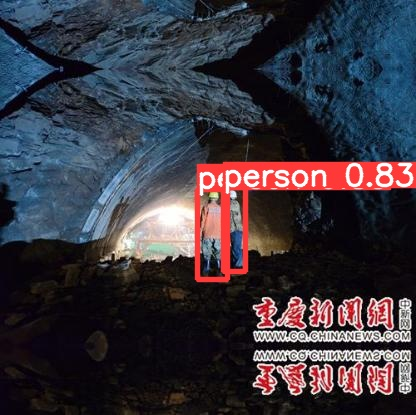

In [ ]:
import glob
import random
from IPython.display import Image, display

image_name = random.choice(glob.glob('/content/yolov5/runs/detect/exp/*.jpg'))
display(Image(filename=image_name))


# 지금 안전모는 아예 못잡음. 훈련이 덜 된 것

In [ ]:
from glob import glob

train_img_list = glob('/content/yolov5/hhw/train/images/*.jpg')
test_img_list = glob('/content/yolov5/hhw/test/images/*.jpg')
print(len(train_img_list),len(test_img_list))

5269 1766


In [ ]:
from sklearn.model_selection import train_test_split

test_img_list, val_img_list = train_test_split(test_img_list,test_size=0.5, random_state=777)
print(len(test_img_list), len(val_img_list))

883 883


In [ ]:
# join 함수를 이용해 각 이미지 리스트를 개행 문자를 이용해 하나의 문자열로 합쳐서 각 파일에 씀
import yaml

with open('/content/yolov5/hhw/train.txt','w') as f:
  f.write('\n'.join(train_img_list)+'\n')

with open('/content/yolov5/hhw/test.txt','w') as f:
  f.write('\n'.join(test_img_list)+'\n')

with open('/content/yolov5/hhw/val.txt','w') as f:
  f.write('\n'.join(val_img_list)+'\n')

In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic   # decorator
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))     # **딕셔너리 형태로 globals 전역변수들을 반환해 포멧팅에 사용하겠다

In [ ]:
%cat /content/yolov5/hhw/data.yaml

train: ../train/images
val: ../valid/images

nc: 3
names: ['head', 'helmet', 'person']

In [ ]:
%%writetemplate /content/yolov5/hhw/data.yaml
train: ./hhw/train/images
test: ./hhw/test/images
val: ./hhw/valid/images

nc:3
names: ['head', 'helmet', 'person']

In [ ]:
%cat /content/yolov5/hhw/data.yaml

train: ./hhw/train/images
test: ./hhw/test/images
val: ./hhw/valid/images

nc:3
names: ['head', 'helmet', 'person']


In [ ]:
# 모델 구성 확인

%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]

In [16]:
with open('/content/yolov5/hhw/data.yaml', 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])
num_classes

# import yaml

# with open('/content/yolov5/hhw/data.yaml', 'r') as stream:
#     data = yaml.safe_load(stream)
#     num_classes = data['nc']

# print(num_classes)

ScannerError: ignored

In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml
# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license
# Parameters
nc: 3  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]
[30]

In [ ]:
%cat /content/yolov5/models/custom_yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license
# Parameters
nc: 3  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],

In [ ]:
%%time
%cd /content/yolov5
!python train.py --img 416 --batch 64 --epochs 50 --data ./hhw/data.yaml --cfg ./models/custom_yolov5s.yaml --weights '' --name hhw_results --cache

/content/yolov5
train: weights=, cfg=./models/custom_yolov5s.yaml, data=./hhw/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=64, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=hhw_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-207-gdf48c20 Python-3.10.12 torch-2.0.1+cu118 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, h